# Inequalities in Health in England
****

# Introduction
Health inequalities are disparities in health status or the allocation of health resources across various population groups that result from the socioeconomic circumstances under which individuals are born, develop, live, work, and age. Health imbalances are unjust and can be remedied with the correct combination of government interventions.

# Importing the Essential Libraries
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import re
import folium
import json
import plotly.express as px

# Preliminary Wrangling
***
It is critical to collect, analyse, and sanitize the data for this project. The data will be collected programmatically, and visual and programmatic inspections will be performed to identify regions in the data that must be cleaned before the analysis can begin.

### Data Gathering

In [2]:
if False:
    url_local_health=" "
    response=requests.get(url_local_health)
    with open(url.split(".")[2]+"."+url.split(".")[-1],'wb') as file:
        file.write(response.content)

In [3]:
life_exp_df=pd.read_csv('list-manage.csv')

#### Pre-loading the dataset

In [4]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6793 entries, 0 to 6792
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Local Health - Office for Health Improvement and Disparities  6793 non-null   object
 1                                                                 6793 non-null   object
 2    .1                                                           6737 non-null   object
 3    .2                                                           6774 non-null   object
dtypes: object(4)
memory usage: 212.4+ KB


### Data Assessment

We will visually examine our dataset using spreadsheet apps like as Excel or Google Sheets to identify data tidiness and quality concerns. Similarly, we will evaluate the data programmatically to ensure that no stone is left unturned in the data cleaning process.

In [5]:
life_exp_df.head()

,Local Health - Office for Health Improvement and Disparities,,.1,.2
0,Geographical references: MSOA 2011 (Middle lev...,,,
1,Code,Label,Life expectancy at birth for males,Life expectancy at birth for females
2,E02000001,City of London 001,91.1,90.2
3,E02000002,Barking and Dagenham 001,79.5,82.5
4,E02000003,Barking and Dagenham 002,78.1,84.2


In [6]:
life_exp_df.columns

Index(['Local Health - Office for Health Improvement and Disparities', ' ',
       ' .1', ' .2'],
      dtype='object')

##### The Data Quality and Tidiness Issue Identified


>__Tidiness issue__
>- life expectancy should be in a single column
>- gender should occupy a separate column
>- Strip the city code of the city label into a separate column



>__Quality issues__
>- Remove the table's title
>- city code to another column
>- rename columns 
>- Replace Null values life expectancy

## Data Cleaning
***

In [7]:
# make a copy of the cleaned dataset
expectancy_df=life_exp_df.copy()

### Action 1
 __Delete the first two rows and rename columns__

In [8]:
#create a new header
header=["area_id","city","male_life_expectancy","female_life_expectancy"]

In [9]:
expectancy_df=expectancy_df.iloc[2:]
expectancy_df.columns=header
expectancy_df

,area_id,city,male_life_expectancy,female_life_expectancy
2,E02000001,City of London 001,91.1,90.2
3,E02000002,Barking and Dagenham 001,79.5,82.5
4,E02000003,Barking and Dagenham 002,78.1,84.2
5,E02000004,Barking and Dagenham 003,77.6,81.8
6,E02000005,Barking and Dagenham 004,79.2,84.6
...,...,...,...,...
6788,E02006930,Greenwich 037,80.8,82.8
6789,E02006931,Greenwich 038,79.6,83.9
6790,E02006932,Liverpool 060,73.4,78.7
6791,E02006933,Liverpool 061,77,84.3


In [10]:
splited_df=expectancy_df.city.str.split(r'(\d+)', expand=True,regex=True,)
splited_df.columns=["city","area_code","empty_column"]
print(splited_df.empty_column.value_counts())


    6791
Name: empty_column, dtype: int64


In [11]:
expectancy_df.drop('city',axis=1,inplace=True)

In [12]:
expectancy_df['city']=splited_df['city']
expectancy_df['area_code']=splited_df['area_code']
expectancy_df.reset_index(drop=True,inplace=True)
expectancy_df=expectancy_df[['area_id','area_code','city',"male_life_expectancy","female_life_expectancy"]]
expectancy_df.head()

,area_id,area_code,city,male_life_expectancy,female_life_expectancy
0,E02000001,001,City of London,91.1,90.2
1,E02000002,001,Barking and Dagenham,79.5,82.5
2,E02000003,002,Barking and Dagenham,78.1,84.2
3,E02000004,003,Barking and Dagenham,77.6,81.8
4,E02000005,004,Barking and Dagenham,79.2,84.6


### Action 2
 __Convert life expectancy column to type float__

In [13]:
#convert life expectancy to type float
expectancy_df.male_life_expectancy=expectancy_df.male_life_expectancy.astype(float)
expectancy_df.female_life_expectancy=expectancy_df.female_life_expectancy.astype(float)

In [14]:
expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_id                 6791 non-null   object 
 1   area_code               6791 non-null   object 
 2   city                    6791 non-null   object 
 3   male_life_expectancy    6735 non-null   float64
 4   female_life_expectancy  6772 non-null   float64
dtypes: float64(2), object(3)
memory usage: 265.4+ KB


### Action 3
 __Replace the null values with the corresponding gender and city average life epectancy__

In [15]:
#check for the sum of null values in columns
expectancy_df.isnull().sum()

area_id                    0
area_code                  0
city                       0
male_life_expectancy      56
female_life_expectancy    19
dtype: int64

> __Observations__
>- There are 56 empty cells in the male life expectancy
>- There 19 empty cells in the female life expectancy

In [16]:
expectancy_df.head()

,area_id,area_code,city,male_life_expectancy,female_life_expectancy
0,E02000001,001,City of London,91.1,90.2
1,E02000002,001,Barking and Dagenham,79.5,82.5
2,E02000003,002,Barking and Dagenham,78.1,84.2
3,E02000004,003,Barking and Dagenham,77.6,81.8
4,E02000005,004,Barking and Dagenham,79.2,84.6


In [17]:
#Trim the traiing spaces around city labels
expectancy_df.city=expectancy_df.city.str.strip()
## filter out the data items with null values
expectancy_df[expectancy_df.male_life_expectancy.isnull()==True ]

,area_id,area_code,city,male_life_expectancy,female_life_expectancy
20,E02000022,021,Barking and Dagenham,NaN,NaN
47,E02000049,026,Barnet,NaN,86.7
168,E02000174,009,Camden,NaN,85.1
186,E02000192,027,Camden,NaN,89.4
205,E02000212,019,Croydon,NaN,83.6
269,E02000277,001,Enfield,NaN,83.3
274,E02000282,006,Enfield,NaN,81.9
395,E02000411,015,Haringey,NaN,83.2
617,E02000639,022,Lambeth,NaN,82.3
647,E02000670,018,Lewisham,NaN,83.0


In [18]:
#replace empty cells with corresponding mean of specific city and gender
for i,cty in enumerate(expectancy_df['city']): 
    if pd.isnull(expectancy_df.loc[i,'male_life_expectancy']):
        expectancy_df.loc[i,'male_life_expectancy']=expectancy_df.query("city==@cty")["male_life_expectancy"].mean()

In [19]:
#replace empty cells with corresponding mean of specific city and gender
for i,cty in enumerate(expectancy_df['city']): 
    if pd.isnull(expectancy_df.loc[i,'female_life_expectancy']):
        expectancy_df.loc[i,'female_life_expectancy']=expectancy_df.query("city==@cty")["female_life_expectancy"].mean()

In [20]:
## check for empty cells
expectancy_df.isnull().sum()

area_id                   0
area_code                 0
city                      0
male_life_expectancy      0
female_life_expectancy    0
dtype: int64

In [21]:
expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_id                 6791 non-null   object 
 1   area_code               6791 non-null   object 
 2   city                    6791 non-null   object 
 3   male_life_expectancy    6791 non-null   float64
 4   female_life_expectancy  6791 non-null   float64
dtypes: float64(2), object(3)
memory usage: 265.4+ KB


In [22]:
## check for data items with null values
expectancy_df[expectancy_df.male_life_expectancy.isnull()==True ]

,area_id,area_code,city,male_life_expectancy,female_life_expectancy


In [23]:
expectancy_df.groupby("city", as_index=False)[expectancy_df.columns[-2:].to_list()].mean()

,city,male_life_expectancy,female_life_expectancy
0,Adur,81.037500,83.825000
1,Allerdale,79.491667,82.516667
2,Amber Valley,79.831250,83.081250
3,Arun,80.057895,83.873684
4,Ashfield,78.368750,81.743750
...,...,...,...
321,Wychavon,81.247368,85.194737
322,Wycombe,81.813043,85.795652
323,Wyre,78.407143,82.514286
324,Wyre Forest,78.985714,83.407143


### Action 1
 __Melt data frame to create a gender column and a single column for gender-specifc life expectancy__

In [24]:
male_expectancy=expectancy_df.copy()
female_expectancy=expectancy_df.copy()

In [25]:
male_expectancy.insert(3,column="gender",value="Male")
male_expectancy.rename({"male_life_expectancy":"life_expectancy"},axis=1,inplace=True)
male_expectancy.drop("female_life_expectancy",axis=1,inplace=True)

In [26]:
female_expectancy.insert(3,column="gender",value="Female")
female_expectancy.rename({"female_life_expectancy":"life_expectancy"},axis=1,inplace=True)
female_expectancy.drop("male_life_expectancy",axis=1,inplace=True)

In [27]:
#create female table
female_expectancy.head()

,area_id,area_code,city,gender,life_expectancy
0,E02000001,001,City of London,Female,90.2
1,E02000002,001,Barking and Dagenham,Female,82.5
2,E02000003,002,Barking and Dagenham,Female,84.2
3,E02000004,003,Barking and Dagenham,Female,81.8
4,E02000005,004,Barking and Dagenham,Female,84.6


In [28]:
# create male table
male_expectancy.head()

,area_id,area_code,city,gender,life_expectancy
0,E02000001,001,City of London,Male,91.1
1,E02000002,001,Barking and Dagenham,Male,79.5
2,E02000003,002,Barking and Dagenham,Male,78.1
3,E02000004,003,Barking and Dagenham,Male,77.6
4,E02000005,004,Barking and Dagenham,Male,79.2


In [29]:
#concatenate both male and female tables
gender_exp_df=pd.concat([male_expectancy,female_expectancy])

#reset table index
gender_exp_df.reset_index(drop=True,inplace=True)

In [30]:
gender_exp_df.head()

,area_id,area_code,city,gender,life_expectancy
0,E02000001,001,City of London,Male,91.1
1,E02000002,001,Barking and Dagenham,Male,79.5
2,E02000003,002,Barking and Dagenham,Male,78.1
3,E02000004,003,Barking and Dagenham,Male,77.6
4,E02000005,004,Barking and Dagenham,Male,79.2


In [31]:
#male=gender_exp_df[gender_exp_df['gender']=="Male"]['life_expectancy']
#female=gender_exp_df[gender_exp_df['gender']=="Female"]['life_expectancy']

In [32]:
gender_exp_df.head()

,area_id,area_code,city,gender,life_expectancy
0,E02000001,001,City of London,Male,91.1
1,E02000002,001,Barking and Dagenham,Male,79.5
2,E02000003,002,Barking and Dagenham,Male,78.1
3,E02000004,003,Barking and Dagenham,Male,77.6
4,E02000005,004,Barking and Dagenham,Male,79.2


In [33]:
#make a copy of cleaned dataset
df = gender_exp_df.copy()

# Exploratory Analysis
***
This section focuses on systematic data exploration, beginning with univariate data and progressing to bivariate and multivariate data. Beginning with univariate visualizations, dig down to multivariate visualizations while asking pertinent questions and noting the observable properties of the visualizations. Given the data presented with, the need to use multivariate visualizations may not arise

### Univariate Analysis
***
The Life expectancy is the key variable in this dataset. Visualizing the distributions is the first step in the direction of the data exploration.

### What is the distribution of life expectancy in England generally?

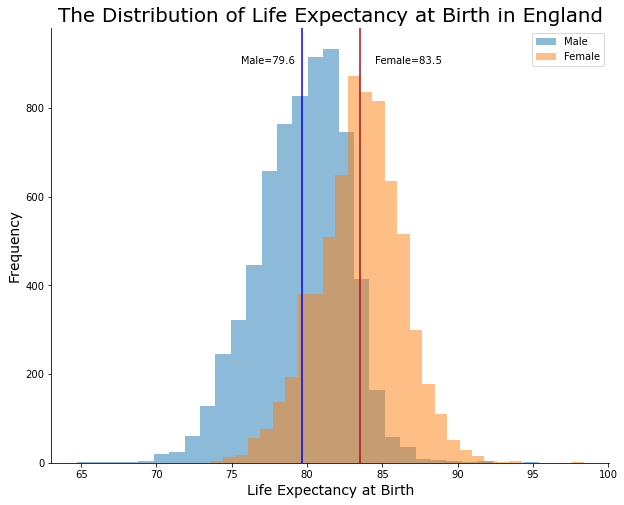

In [34]:
fig,ax=plt.subplots(figsize=(10,8))
m_mean = df.query("gender == 'Male'")['life_expectancy'].mean()
f_mean = df.query("gender == 'Female'")['life_expectancy'].mean()

plt.hist(data=df.query("gender == 'Male'"), x='life_expectancy', bins=30, label='Male', alpha=0.5)
plt.hist(data=df.query("gender == 'Female'"), x='life_expectancy', bins=30, label='Female', alpha=0.5)
plt.axvline(x=m_mean, color='blue')
plt.axvline(x=f_mean,color='#AF0B1E')
plt.text(75.6,900,"Male=79.6",size=10,name="Verdana")
plt.text(84.5,900,"Female=83.5",size=10,name="Verdana")
plt.title("The Distribution of Life Expectancy at Birth in England",size=20,name="Verdana")
plt.xlabel("Life Expectancy at Birth",size=14,name="Verdana")
plt.ylabel("Frequency",size=14,name="Verdana")
sns.despine()
plt.legend();

>Life expectancy is unimodal and follows a normal distribution, with male peaks at 79 and female peaks around 83.

>Clearly, the life expectancy at birth in England spans from 64 to 98 years.

>In most circumstances, females tend to have a longer life expectancy than males.

### How probable is the life expectancy going to be higer for females across the cities in England?

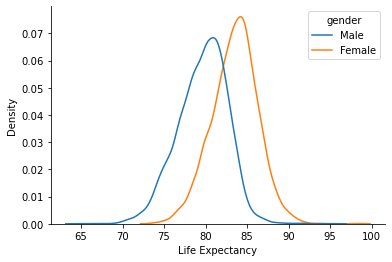

In [35]:
sns.kdeplot(data=df, x='life_expectancy', hue='gender');
plt.xlabel("Life Expectancy")
sns.despine()

> The area under the curve by extimation dipicts that females are likely going to have higher life expectancy than their male counterparts

In [36]:
grouped = df.groupby(['city', 'gender'])[['life_expectancy']].mean().reset_index()
grouped.head()

,city,gender,life_expectancy
0,Adur,Female,83.825000
1,Adur,Male,81.037500
2,Allerdale,Female,82.516667
3,Allerdale,Male,79.491667
4,Amber Valley,Female,83.081250


### In how many cities is life female life expectancy higher than the males?

In [37]:
compare = expectancy_df.iloc[:, 2:]
compare = compare.groupby('city').mean()
compare['female_higher'] = compare.female_life_expectancy > compare.male_life_expectancy
print('Females have higher life expectancy than males in {} of the {} cities in the dataset'.format(compare.female_higher.sum(),compare.shape[0]))

Females have higher life expectancy than males in 325 of the 326 cities in the dataset


In [38]:
compare[compare.female_higher == False]

,male_life_expectancy,female_life_expectancy,female_higher
city,,,
City of London,91.1,90.2,False


>Surprisingly, only in the City of London is male life expectancy higher than female life expectancy.

>Clearly, females have a 99.7% chance of living longer lives in any place in England.

### What is then the average life expectancy at birth in England?

In [39]:
england_life_expectancy=round(np.mean([f_mean,m_mean]),2)
print('The average life expectancy in England is {} '.format(england_life_expectancy))


The average life expectancy in England is 81.57 


### How many cities have life expectancy at birth above the average life expectancy in England?

In [40]:
city_exp=gender_exp_df.groupby("city",as_index=False)["life_expectancy"].mean()
city_exp["above_average"]=city_exp.life_expectancy>england_life_expectancy


In [41]:
print('{} cities have life expectancy above the average life expectancy in England'.format(city_exp.query("above_average==True")['above_average'].count()))

193 cities have life expectancy above the average life expectancy in England


### How many cities have life expectanacy at birth below the average life expectancy in England

In [42]:
print('{} cities have life expectancy below the average life expectancy in England'.format(city_exp.query("above_average==False")['above_average'].count()))

133 cities have life expectancy below the average life expectancy in England


### What are the top 5 cities to live long in England?

In [43]:
#city_exp.above_average.value_counts()

In [44]:
above_avg=city_exp.query("above_average==True")
above_avg.sort_values("life_expectancy",ascending=False).reset_index(drop=True,inplace=True)
below_avg=city_exp.query("above_average==False")

In [45]:
above_avg.sort_values("life_expectancy",ascending=False).head()

,city,life_expectancy,above_average
60,City of London,90.650000,True
137,Isles of Scilly,86.300000,True
139,Kensington and Chelsea,85.797619,True
309,Westminster,85.777083,True
43,Camden,85.460302,True


### What are the worst 5 cities to live in England with regard to life expectancy?

In [46]:
below_avg.sort_values("life_expectancy",ascending=False).head()

,city,life_expectancy,above_average
239,South Holland,81.550000,False
320,Worthing,81.546154,False
97,Erewash,81.480000,False
284,Torridge,81.477778,False
2,Amber Valley,81.456250,False


In [47]:
below_avg

,city,life_expectancy,above_average
1,Allerdale,81.004167,False
2,Amber Valley,81.456250,False
4,Ashfield,80.056250,False
8,Barking and Dagenham,80.176190,False
10,Barnsley,79.925000,False
...,...,...,...
318,Wolverhampton,79.407576,False
319,Worcester,81.250000,False
320,Worthing,81.546154,False
323,Wyre,80.460714,False


In [48]:
#plt.barh(below_avg["city"],below_avg["diff"])

In [49]:
#below_avg["diff"]

In [50]:
# ## find the iniquaity gap in life expectancy below the mean
# below_c=below_avg.copy()
# below_c['diff']=round(england_life_expectancy-below_avg['life_expectancy'],2)
# xb=below_c.sort_values("diff",ascending=True).tail(10)
# xb.head()

In [51]:
## find the iniquaity gap in life expectancy below the mean
above_c=above_avg.copy()
above_c['diff']=round(above_avg['life_expectancy']-england_life_expectancy,2)
above_c.head()

,city,life_expectancy,above_average,diff
0,Adur,82.431250,True,0.86
3,Arun,81.965789,True,0.40
5,Ashford,82.321429,True,0.75
6,Aylesbury Vale,82.850000,True,1.28
7,Babergh,83.368182,True,1.80


### What is the disparity in Life expectancy at birth in England's Top cities?

In [52]:
xa=above_c.sort_values("diff",ascending=True).tail(10)
xa

,city,life_expectancy,above_average,diff
289,Vale of White Horse,84.439286,True,2.87
235,South Cambridgeshire,84.542500,True,2.97
209,Richmond upon Thames,84.563043,True,2.99
120,Harrow,84.633333,True,3.06
121,Hart,84.663636,True,3.09
43,Camden,85.460302,True,3.89
309,Westminster,85.777083,True,4.21
139,Kensington and Chelsea,85.797619,True,4.23
137,Isles of Scilly,86.300000,True,4.73
60,City of London,90.650000,True,9.08


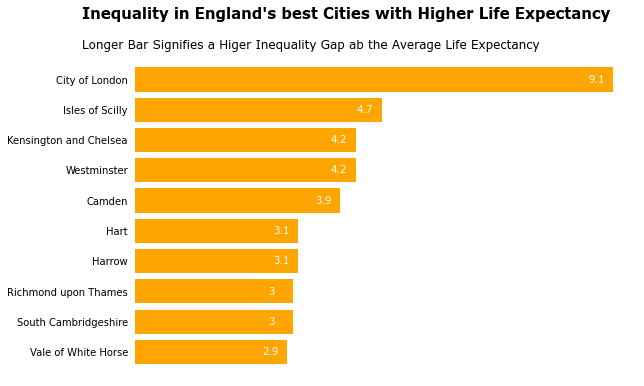

In [53]:
fig,ax=plt.subplots(figsize=(9,6))
p=plt.barh(xa['city'],round(xa['diff'],1),color="orange")
plt.bar_label(p,label_type='edge',size=10,name="Verdana",alpha=1,padding=-25,color='#fff')
plt.tick_params(left=False)
plt.xticks([])
sns.despine(bottom=True,left=True)
plt.text(-1,11,"Inequality in England's best Cities with Higher Life Expectancy  ",color="k",size=15,name="Verdana", weight="bold")
plt.text(-1,10,"Longer Bar Signifies a Higer Inequality Gap ab the Average Life Expectancy",color="k",size=12,name="Verdana")
plt.show()

>An infant in the Vale of White Horse will likely die 6 years earlier than his pairs in the City of London

In [54]:
## find the iniquaity gap in life expectancy below the mean
below_c=below_avg.copy()
below_c['diff']=round(england_life_expectancy-below_avg['life_expectancy'],2)
xb=below_c.sort_values("diff",ascending=True).tail(10)
xb.head()

,city,life_expectancy,above_average,diff
122,Hartlepool,78.752652,False,2.82
20,Blackburn with Darwen,78.658333,False,2.91
153,Lincoln,78.609091,False,2.96
261,Stoke-on-Trent,78.595588,False,2.97
39,Burnley,78.550000,False,3.02


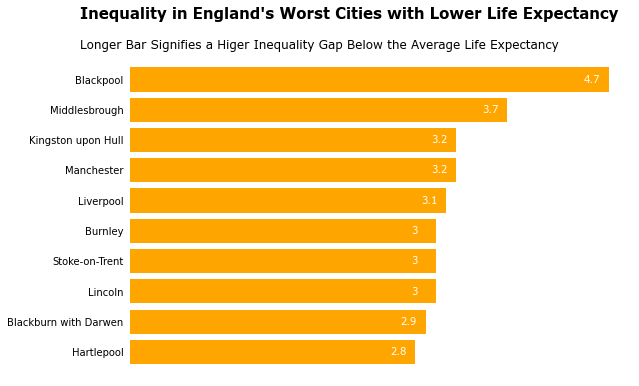

In [55]:
fig,ax=plt.subplots(figsize=(9,6))
p=plt.barh(xb['city'],round(xb['diff'],1),color="orange")
plt.bar_label(p,label_type='edge',size=10,name="Verdana",alpha=1,padding=-25,color='#fff')
plt.tick_params(left=False)
plt.xticks([])
sns.despine(bottom=True,left=True)
plt.text(-0.5,11,"Inequality in England's Worst Cities with Lower Life Expectancy  ",color="k",size=15,name="Verdana", weight="bold")
plt.text(-0.5,10,"Longer Bar Signifies a Higer Inequality Gap Below the Average Life Expectancy",color="k",size=12,name="Verdana")
plt.show()

> It is evident that the

# Conclusion
***
In general, the difference in life expectancy between any city and the average English life expectancy runs between -4.7 and 9.1. Despite its reputation for "hustle and bustle," London has the greatest inequality gap, 9.1. In other words, a newborn born in the City of London is more likely to live longer than in any other city in England. This is much worse in Blackpool, where the inequality gap is 4.7 years lower than the national average. In other words, a newborn in Blackpool is 13.8 years more likely to die than his counterpart in the City of London.

# Limitations
***
The dataset is insufficient to fully explain the causes of health inequalities in England. Additional data must be collected to determine the differences identified in this analysis.